In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('D:/ML_project/notebook/data/stud.csv')

In [4]:
df.head(4)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
for i in df.columns:
    print(f"unique values in {i} column :",df[i].unique())

unique values in gender column : ['female' 'male']
unique values in race_ethnicity column : ['group B' 'group C' 'group A' 'group D' 'group E']
unique values in parental_level_of_education column : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
unique values in lunch column : ['standard' 'free/reduced']
unique values in test_preparation_course column : ['none' 'completed']
unique values in math_score column : [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
unique values in reading_score column : [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63

In [16]:
numerical_features = [features for features in df.columns if df[features].dtype != 'object']
categorical_columns = [features for features in df.columns if df[features].dtype == 'object']

In [19]:
print("we have numerical features {} and count is {}".format(numerical_features, len(numerical_features)))
print("we have categorical features {} and count is {}".format(categorical_columns, len(categorical_columns)))

we have numerical features ['math_score', 'reading_score', 'writing_score'] and count is 3
we have categorical features ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] and count is 5


In [20]:
#add columns for total score and average score(feature engineering)

df['Total_score']= df['math_score'] + df['reading_score'] + df['writing_score']


In [21]:
df['Average_score'] = df['Total_score']/3
df.head(3)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667


In [26]:
#number of student with highest marks 
high_math=df['math_score'][df['math_score']==100].count()
print(f'number of student with highest marks in maths is : {high_math}')
high_read= df['reading_score'][df['reading_score']==100].count()
high_write = df['writing_score'][df['writing_score']==100].count()
print(f'number of student with highest marks in reading is : {high_read}')
print(f'number of student with highest marks in writing is : {high_write}')

number of student with highest marks in maths is : 7
number of student with highest marks in reading is : 17
number of student with highest marks in writing is : 14


In [27]:
#number of student with lowest marks 
low_math=df['math_score'][df['math_score']<=20].count()
print(f'number of student with highest marks in maths is : {low_math}')
low_read= df['reading_score'][df['reading_score']<=20].count()
low_write = df['writing_score'][df['writing_score']<=20].count()
print(f'number of student with highest marks in reading is : {low_read}')
print(f'number of student with highest marks in writing is : {low_write}')

number of student with highest marks in maths is : 4
number of student with highest marks in reading is : 1
number of student with highest marks in writing is : 3


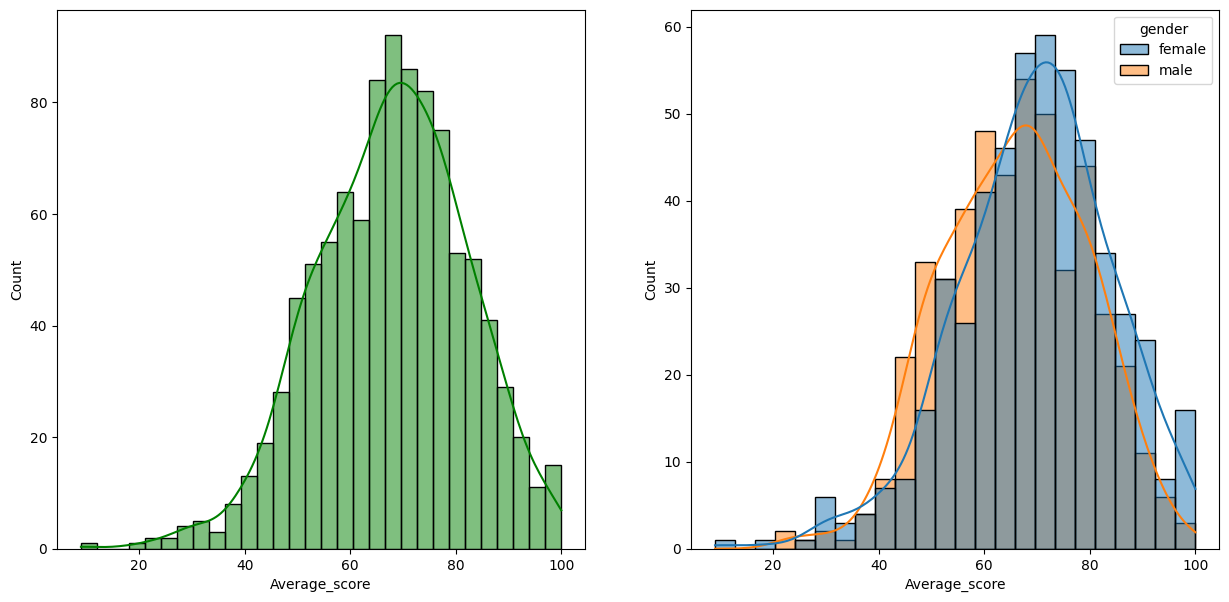

In [33]:
#Visualization or Data Exploration
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Average_score',kde=True,hue='gender')
plt.show()

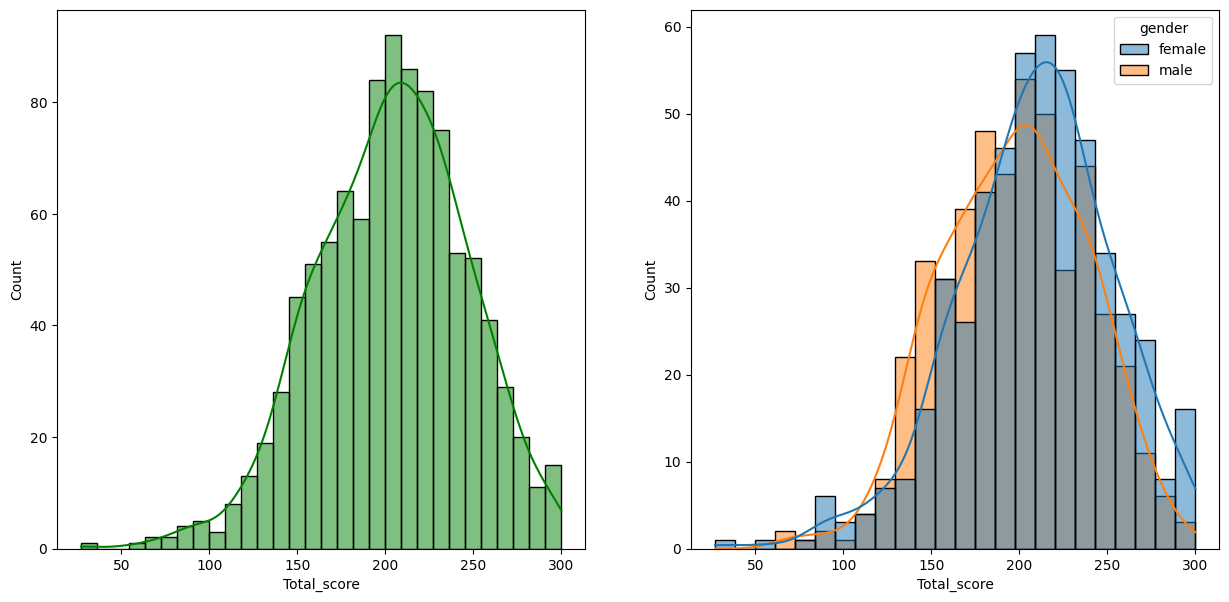

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')
plt.show()